<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_8_Sentiment_Analysis_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 8: Sentiment Analysis
# 21130429 - Phạm Tiến Lộc


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data


#Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from nltk.tokenize import word_tokenize
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from string import punctuation

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#Task 1. For a given dataset (named dataset1.csv) with emoticons removed. The dataset includes 2 attributes:


*   0 - sentiment (0 = negative, 1 = positive)
*   1 - text






#Task 1.1. Load the dataset and apply appropriate preprocessing techniques

In [4]:
#code
ds81 = pd.read_csv('dataset81.csv')

In [5]:
ds81_downsize = ds81.sample(n=100000, random_state=42)
ds81_downsize

,sentiment,text
915963,1,just came bak from danc with my nee cd haha im...
357840,0,post offic n other runnin around to do geesh n...
613198,0,sabrin ooooooh this song i hope he know about ...
775464,0,i wish iwasnt here im think n amp be around he...
825095,1,http twitpic com kyv all i do is twitter accor...
...,...,...
394747,0,i just wan na give up tbh or have a extrem goo...
799647,0,i total ate spring at gymnast my face hurt it ...
315077,0,leenkwan oh no the one you were wear today how...
21044,0,awh sh t the sun is start to rise home finaaal...


In [6]:
import gc
del ds81
gc.collect()

31

In [7]:
ds81_downsize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 915963 to 148593
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  100000 non-null  int64 
 1   text       100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [8]:
ds81_downsize.isnull().sum()

,0
sentiment,0
text,0


In [9]:
ds81_downsize = ds81_downsize.dropna()

In [10]:
ds81_downsize.isnull().sum()

,0
sentiment,0
text,0


In [11]:
ds81_downsize['sentiment'].unique()

array([1, 0])

In [12]:
negative_text = ' '.join(ds81_downsize[ds81_downsize['sentiment'] == 0]['text'])
positive_text = ' '.join(ds81_downsize[ds81_downsize['sentiment'] == 1]['text'])
ds81_downsize = ds81_downsize[['sentiment','text']]
ds81_downsize.head()

,sentiment,text
915963,1,just came bak from danc with my nee cd haha im...
357840,0,post offic n other runnin around to do geesh n...
613198,0,sabrin ooooooh this song i hope he know about ...
775464,0,i wish iwasnt here im think n amp be around he...
825095,1,http twitpic com kyv all i do is twitter accor...


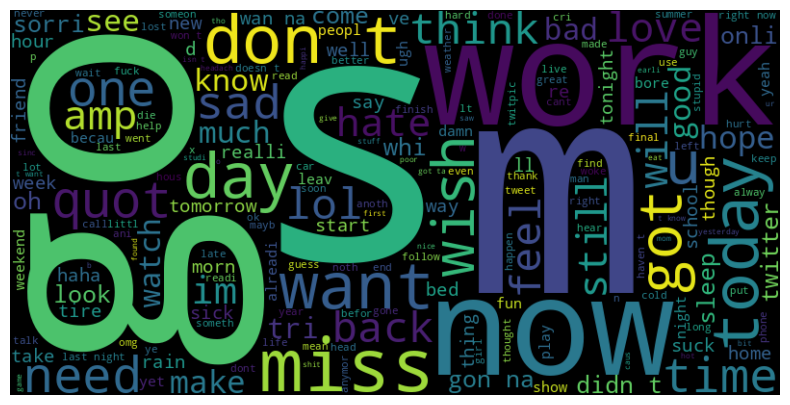

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
x = ds81_downsize['text']
y = ds81_downsize['sentiment']

vectorizer = tf()
vectors = vectorizer.fit_transform(x)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.3, random_state=42)

#Task 1.2. Apply classification algorithms (Decision Tree, kNN, Naive Bayes, RandomForest) to the dataset obtained from Task 1.1

In [16]:
#code
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
dt_y_proba = dt_clf.predict_proba(X_test)

In [17]:
#code
# kNN_clf = KNeighborsClassifier(n_neighbors=3, algorithm='auto', n_jobs=-1)
# kNN_clf.fit(X_train, y_train)
# kNN_y_pred = kNN_clf.predict(X_test)
# kNN_y_proba = kNN_clf.predict_proba(X_test)

In [ ]:
#code
# gnb_clf = GaussianNB()
# gnb_clf.fit(X_train.toarray(), y_train)
# gnb_y_pred = gnb_clf.predict(X_test.toarray())
# gnb_y_proba = gnb_clf.predict_proba(X_test.toarray())

In [17]:
#code
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=3)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_y_proba = rf_clf.predict_proba(X_test)

#Task 1.3. Apply PCA to get 100 componets from the training and test sets.


In [18]:
#code
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Task 1.4. Apply classification algorithms (Decision Tree, kNN, Naive Bayes, RandomForest) to the dataset obtained from Task 1.3

In [21]:
#code
dt_clf_pca = DecisionTreeClassifier(max_depth=3)
dt_clf_pca.fit(X_train_pca, y_train)
dt_y_pred_pca = dt_clf_pca.predict(X_test_pca)
dt_y_proba_pca = dt_clf_pca.predict_proba(X_test_pca)

# kNN_clf_pca = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', n_jobs=-1)
# kNN_clf_pca.fit(X_train_pca, y_train)
# kNN_y_pred_pca = kNN_clf.predict(X_test_pca)
# kNN_y_proba_pca = kNN_clf_pca.predict_proba(X_test_pca)

# gnb_clf_pca = GaussianNB()
# gnb_clf_pca.fit(X_train_pca.toarray(), y_train)
# gnb_y_pred_pca = gnb_clf.predict(X_test_pca.toarray())
# gnb_y_proba_pca = gnb_clf_pca.predict_proba(X_test_pca.toarray())

rf_clf_pca = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_clf_pca.fit(X_train_pca, y_train)
rf_y_pred_pca = rf_clf_pca.predict(X_test_pca)
rf_y_proba_pca = rf_clf_pca.predict_proba(X_test_pca)

#Task 1.5. Plot ROC curve and report the AUC values for classification results on test set in Task 1.3

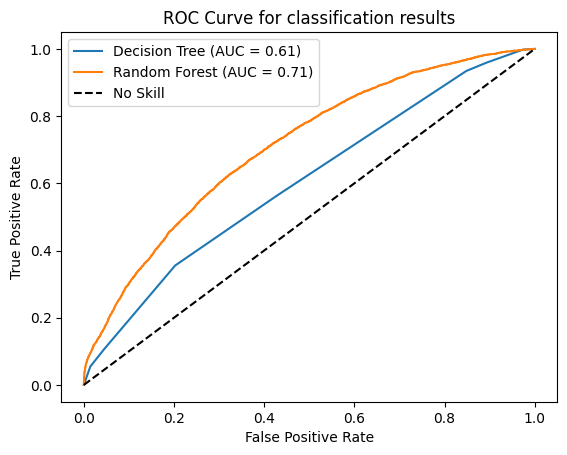

In [22]:
#code
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_proba_pca[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

# kNN_fpr, kNN_tpr, _ = roc_curve(y_test, kNN_y_proba_pca[:, 1])
# kNN_roc_auc = auc(kNN_fpr, kNN_tpr)

# gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_y_proba_pca[:, 1])
# gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_proba_pca[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
# plt.plot(kNN_fpr, kNN_tpr, label=f'kNN (AUC = {kNN_roc_auc:.2f})')
# plt.plot(gnb_fpr, gnb_tpr, label=f'Naive Bayes (AUC = {gnb_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for classification results")
plt.legend(loc="best")
plt.show()

#Task 1.6.  Compare the performance of models in Task 1.2 and Task 1.4 based on accuracy, precision, recall, f1 metrics using PrettyTable

In [23]:
#code
# Without  PCA
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='macro')
dt_recall = recall_score(y_test, dt_y_pred, average='macro')
dt_f1 = f1_score(y_test, dt_y_pred, average='macro')

# kNN_accuracy = accuracy_score(y_test, kNN_y_pred)
# kNN_precision = precision_score(y_test, kNN_y_pred, average='macro')
# kNN_recall = recall_score(y_test, kNN_y_pred, average='macro')
# kNN_f1 = f1_score(y_test, kNN_y_pred, average='macro')

# gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
# gnb_precision = precision_score(y_test, gnb_y_pred, average='macro')
# gnb_recall = recall_score(y_test, gnb_y_pred, average='macro')
# gnb_f1 = f1_score(y_test, gnb_y_pred, average='macro')

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
rf_recall = recall_score(y_test, rf_y_pred, average='macro')
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')

# With PCA
dt_accuracy_pca = accuracy_score(y_test, dt_y_pred_pca);
dt_precision_pca = precision_score(y_test, dt_y_pred_pca, average='macro')
dt_recall_pca = recall_score(y_test, dt_y_pred_pca, average='macro')
dt_f1_pca = f1_score(y_test, dt_y_pred_pca, average='macro')

# kNN_accuracy_pca = accuracy_score(y_test, kNN_y_pred_pca)
# kNN_precision_pca = precision_score(y_test, kNN_y_pred_pca, average='macro')
# kNN_recall_pca = recall_score(y_test, kNN_y_pred_pca, average='macro')
# kNN_f1_pca = f1_score(y_test, kNN_y_pred_pca, average='macro')

# gnb_accuracy_pca = accuracy_score(y_test, gnb_y_pred_pca)
# gnb_precision_pca = precision_score(y_test, gnb_y_pred_pca, average='macro')
# gnb_recall_pca = recall_score(y_test, gnb_y_pred_pca, average='macro')
# gnb_f1_pca = f1_score(y_test, gnb_y_pred_pca, average='macro')

rf_accuracy_pca = accuracy_score(y_test, rf_y_pred_pca)
rf_precision_pca = precision_score(y_test, rf_y_pred_pca, average='macro')
rf_recall_pca = recall_score(y_test, rf_y_pred_pca, average='macro')
rf_f1_pca = f1_score(y_test, rf_y_pred_pca, average='macro')

from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

myTable.add_row(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1])
# myTable.add_row(["KNN", kNN_accuracy, kNN_precision, kNN_recall, kNN_f1])
# myTable.add_row(["Naive Bayes", gnb_accuracy, gnb_precision, gnb_recall, gnb_f1])
myTable.add_row(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1])
myTable.add_row(["Decision Tree PCA", dt_accuracy_pca, dt_precision_pca, dt_recall_pca, dt_f1_pca])
# myTable.add_row(["KNN PCA", kNN_accuracy_pca, kNN_precision_pca, gnb_recall_pca, gnb_f1_pca])
# myTable.add_row(["Naive Bayes PCA", gnb_accuracy_pca, gnb_precision_pca, gnb_recall_pca, gnb_f1_pca])
myTable.add_row(["Random Forest PCA", rf_accuracy_pca, rf_precision_pca, rf_recall_pca, rf_f1_pca])

print(myTable)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


+-------------------+--------------------+--------------------+--------------------+---------------------+
|       Model       |      Accuracy      |     Precision      |       Recall       |       F1-Score      |
+-------------------+--------------------+--------------------+--------------------+---------------------+
|   Decision Tree   | 0.7737666666666667 | 0.7268354331276442 | 0.5288342289025638 | 0.49646209161189314 |
|   Random Forest   | 0.7654666666666666 | 0.3827333333333333 |        0.5         |  0.4335775243561665 |
| Decision Tree PCA | 0.7672666666666667 | 0.6552512414578133 | 0.5202016523576611 |  0.4829622458962837 |
| Random Forest PCA | 0.7654666666666666 | 0.3827333333333333 |        0.5         |  0.4335775243561665 |
+-------------------+--------------------+--------------------+--------------------+---------------------+


#Task 2. For a given dataset 2 with three classes: Positive, Negative and Neutral. Notice that not relevant to the entity (i.e. Irrelevant) as Neutral.



#Task 2.1. Load the dataset and apply appropriate preprocessing techniques. Remember to remove irrelevant attributes and check missing values (remove if the missing values are small)

In [25]:
#code
ds82 = pd.read_csv('dataset82.csv')
ds82.columns = ['id', 'app', 'sentiment', 'comment']
ds82.head()

,id,app,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [26]:
ds82.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   app        74681 non-null  object
 2   sentiment  74681 non-null  object
 3   comment    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [27]:
ds82.isnull().sum()

,0
id,0
app,0
sentiment,0
comment,686


In [28]:
ds82 = ds82.dropna()

In [29]:
ds82.isnull().sum()

,0
id,0
app,0
sentiment,0
comment,0


In [30]:
ds82['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [33]:
ds82['sentiment'] = ds82['sentiment'].replace({'Irrelevant': 'Neutral'})
ds82['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [40]:
chars = ["â", "@", "<unk>", "¼", "«", "€™"]
for char in chars:
    ds82['comment'] = ds82['comment'].str.replace(char, '', regex=False)

In [43]:
x = ds82['comment']
y = ds82['sentiment']

vectorizer = tf()
vectors = vectorizer.fit_transform(x)
y_bin = y.map({'Positive': 1, 'Neutral': 1, 'Negative': 0})
X_train, X_test, y_train, y_test = train_test_split(vectors, y_bin, test_size=0.3, random_state=42)

#Task 2.2. Apply classification algorithms (Decision Tree, kNN, Naive Bayes, RandomForest) to the dataset obtained from Task 2.1

In [45]:
#code
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
dt_y_proba = dt_clf.predict_proba(X_test)

# kNN_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)
# kNN_clf.fit(X_train, y_train)
# kNN_y_pred = kNN_clf.predict(X_test)
# kNN_y_proba = kNN_clf.predict_proba(X_test)

# gnb_clf = GaussianNB()
# gnb_clf.fit(X_train.toarray(), y_train)
# gnb_y_pred = gnb_clf.predict(X_test.toarray())
# gnb_y_proba = gnb_clf.predict_proba(X_test.toarray())

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_y_proba = rf_clf.predict_proba(X_test)

#Task 2.3. Report the performance of the models trained in Task 2.2. on test set using accuracy, precision, recall, f measure metrics

In [47]:
#code
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='macro')
dt_recall = recall_score(y_test, dt_y_pred, average='macro')
dt_f1 = f1_score(y_test, dt_y_pred, average='macro')

# kNN_accuracy = accuracy_score(y_test, kNN_y_pred)
# kNN_precision = precision_score(y_test, kNN_y_pred, average='macro')
# kNN_recall = recall_score(y_test, kNN_y_pred, average='macro')
# kNN_f1 = f1_score(y_test, kNN_y_pred, average='macro')

# gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
# gnb_precision = precision_score(y_test, gnb_y_pred, average='macro')
# gnb_recall = recall_score(y_test, gnb_y_pred, average='macro')
# gnb_f1 = f1_score(y_test, gnb_y_pred, average='macro')

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
rf_recall = recall_score(y_test, rf_y_pred, average='macro')
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')

myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

myTable.add_row(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1])
# myTable.add_row(["KNN", kNN_accuracy, kNN_precision, kNN_recall, kNN_f1])
# myTable.add_row(["Naive Bayes", gnb_accuracy, gnb_precision, gnb_recall, gnb_f1])
myTable.add_row(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1])

print(myTable)

+---------------+--------------------+---------------------+--------------------+--------------------+
|     Model     |      Accuracy      |      Precision      |       Recall       |      F1-Score      |
+---------------+--------------------+---------------------+--------------------+--------------------+
| Decision Tree | 0.7318798144060543 |  0.7417596102154012 | 0.5720062159836363 | 0.5550265489238648 |
| Random Forest | 0.6977791792423083 | 0.34888958962115413 |        0.5         | 0.4109952506036244 |
+---------------+--------------------+---------------------+--------------------+--------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Task 2.4. Plot ROC curve and report the AUC values for classification results on test set in Task 2.3

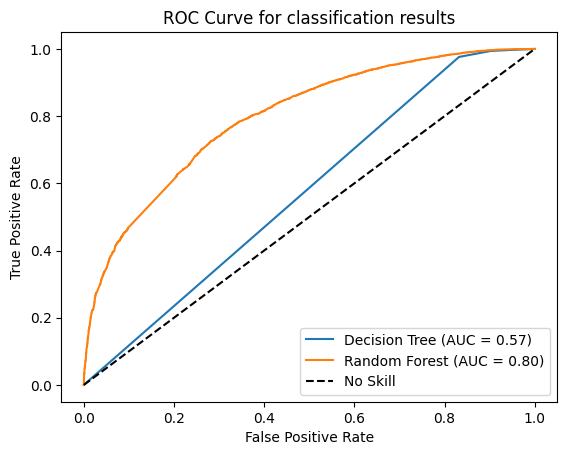

In [48]:
#code
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_proba[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

# kNN_fpr, kNN_tpr, _ = roc_curve(y_test, kNN_y_proba[:, 1])
# kNN_roc_auc = auc(kNN_fpr, kNN_tpr)

# gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_y_proba[:, 1])
# gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_proba[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
# plt.plot(kNN_fpr, kNN_tpr, label=f'kNN (AUC = {kNN_roc_auc:.2f})')
# plt.plot(gnb_fpr, gnb_tpr, label=f'Naive Bayes (AUC = {gnb_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for classification results")
plt.legend(loc="best")
plt.show()